# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2021-12-17 15:54:54
Persistent Unique Scan ID: '465fb3e3-c4df-4ee7-aada-dcf00d3aac49'


New stream: 'primary'
+-----------+------------+-------------------------+------------+
|   seq_num |       time | aperture_horizontalSize |    w9_mean |
+-----------+------------+-------------------------+------------+
|         1 | 15:55:27.8 |                   0.000 |      0.000 |


|         2 | 15:55:55.4 |                   0.500 | 2510544190625.287 |


|         3 | 15:56:23.1 |                   1.000 | 41560782559219.422 |


|         4 | 15:56:51.7 |                   1.500 | 136793792948293.203 |


|         5 | 15:57:20.4 |                   2.000 | 346875726031568.125 |
+-----------+------------+-------------------------+------------+
generator scan ['465fb3e3'] (scan num: 1)





                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2021-12-17 15:55:27.867558479                      0.0   
2       2021-12-17 15:55:55.499387980                      0.5   
3       2021-12-17 15:56:23.130691051                      1.0   
4       2021-12-17 15:56:51.775816202                      1.5   
5       2021-12-17 15:57:20.442461252                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                    

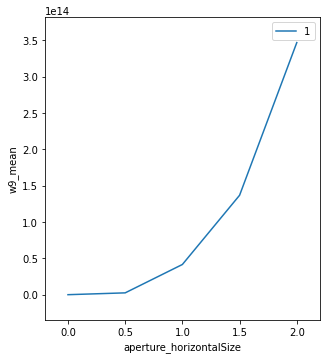

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


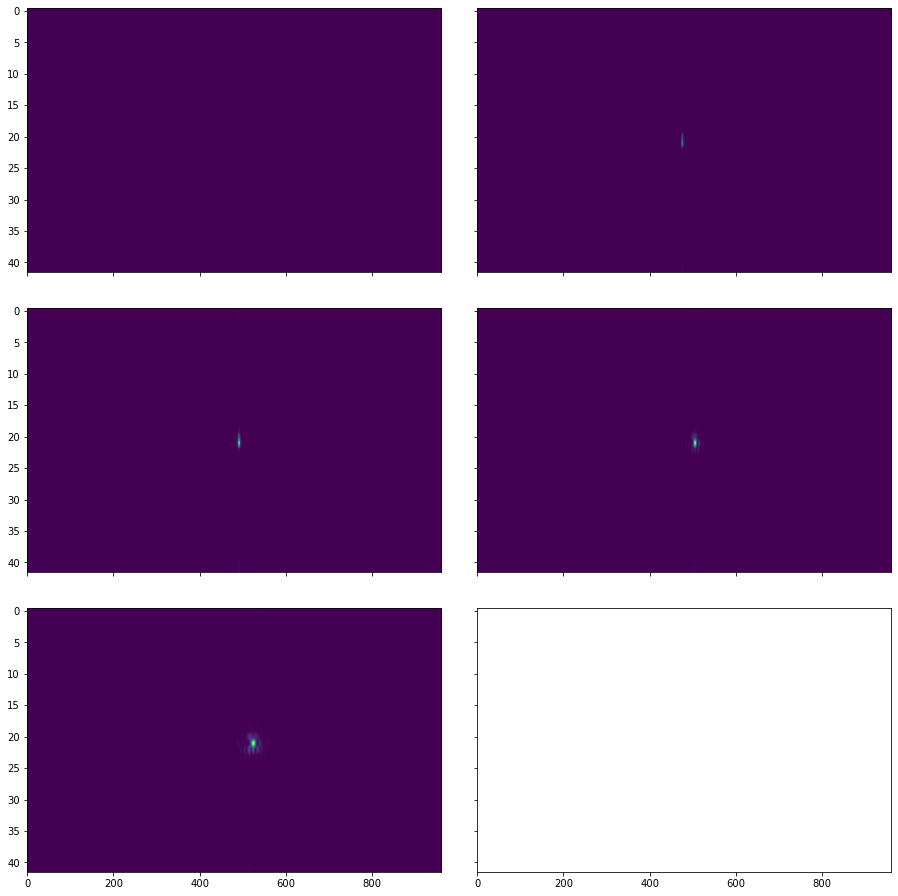

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9



Transient Scan ID: 1     Time: 2021-12-17 15:57:22
Persistent Unique Scan ID: '90601d4b-f592-4746-80b8-122250568366'


New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | toroid_r_maj |
+-----------+------------+--------------+
|         1 | 15:57:28.7 |    10000.000 |


|         2 | 15:57:33.9 |    12000.000 |


|         3 | 15:57:39.1 |    14000.000 |


|         4 | 15:57:44.3 |    16000.000 |


|         5 | 15:57:49.5 |    18000.000 |


|         6 | 15:57:54.6 |    20000.000 |


|         7 | 15:57:59.8 |    22000.000 |


|         8 | 15:58:05.0 |    24000.000 |


|         9 | 15:58:10.2 |    26000.000 |


|        10 | 15:58:15.4 |    28000.000 |


|        11 | 15:58:20.6 |    30000.000 |


|        12 | 15:58:25.8 |    32000.000 |


|        13 | 15:58:31.0 |    34000.000 |


|        14 | 15:58:36.1 |    36000.000 |


|        15 | 15:58:41.3 |    38000.000 |


|        16 | 15:58:46.5 |    40000.000 |


|        17 | 15:58:51.7 |    42000.000 |


|        18 | 15:58:56.8 |    44000.000 |


|        19 | 15:59:02.0 |    46000.000 |


|        20 | 15:59:07.2 |    48000.000 |


|        21 | 15:59:12.4 |    50000.000 |
+-----------+------------+--------------+
generator scan ['90601d4b'] (scan num: 1)





                                 time  \
seq_num                                 
1       2021-12-17 15:57:28.796608686   
2       2021-12-17 15:57:33.965909004   
3       2021-12-17 15:57:39.145949125   
4       2021-12-17 15:57:44.335894585   
5       2021-12-17 15:57:49.521325111   
6       2021-12-17 15:57:54.686475039   
7       2021-12-17 15:57:59.872941256   
8       2021-12-17 15:58:05.057973385   
9       2021-12-17 15:58:10.240386963   
10      2021-12-17 15:58:15.483249903   
11      2021-12-17 15:58:20.659877777   
12      2021-12-17 15:58:25.840894461   
13      2021-12-17 15:58:31.023083925   
14      2021-12-17 15:58:36.199554443   
15      2021-12-17 15:58:41.369368792   
16      2021-12-17 15:58:46.548762321   
17      2021-12-17 15:58:51.726380587   
18      2021-12-17 15:58:56.897060633   
19      2021-12-17 15:59:02.078911543   
20      2021-12-17 15:59:07.257993698   
21      2021-12-17 15:59:12.442096710   

                                      bsr_sirepo_data_js

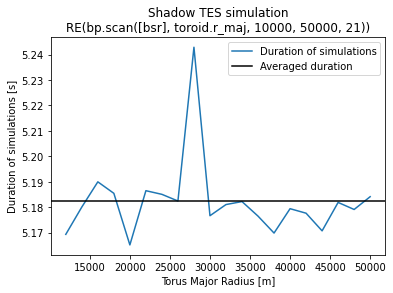

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()